In [1]:
import matplotlib.pyplot as plt
import pandas as pd
style_available = plt.style.available
print("可以使用 {} 個佈景主題。".format(len(style_available)))
print(style_available)

可以使用 26 個佈景主題。
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


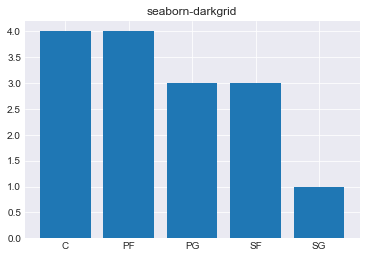

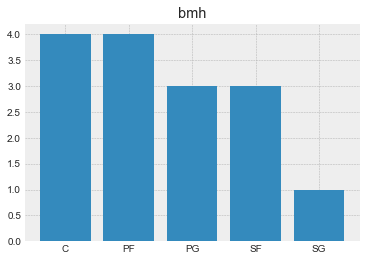

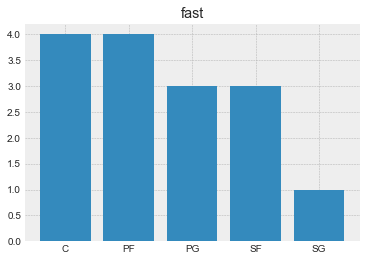

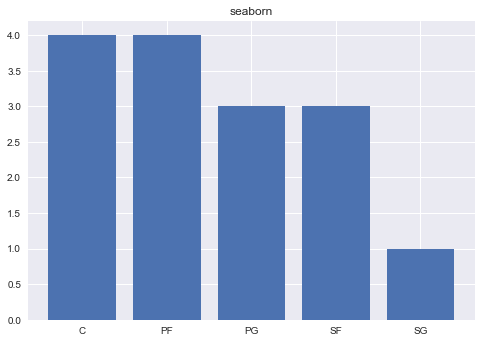

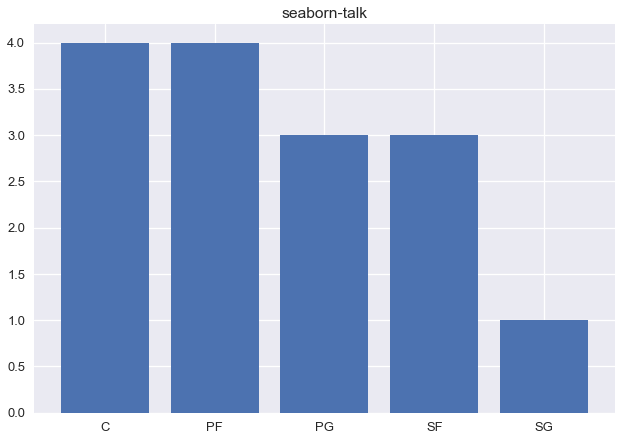

In [8]:
#groupby() 依照自己指定欄位分組
import pandas as pd
csv_url = 'https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv'
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")
pos = grouped["Pos"].count()
plt_thems = ["seaborn-darkgrid","bmh","fast","seaborn","seaborn-talk"]
for i in range(5):
    plt.style.use(plt_thems[i])
    plt.bar(range(1,6),pos)
    plt.xticks(range(1,6),pos.index)
    plt.title(plt_thems[i])
    plt.show()
    print("\n")

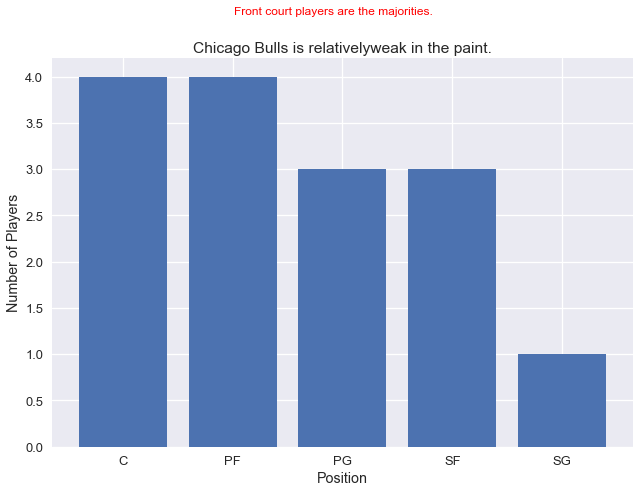

In [11]:
csv_url = 'https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv'
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")
pos = grouped["Pos"].count()


plt.bar(range(1,6),pos)
plt.xticks(range(1,6),pos.index)
plt.suptitle("Front court players are the majorities.",c = 'r')

plt.title("Chicago Bulls is relativelyweak in the paint.")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.show()

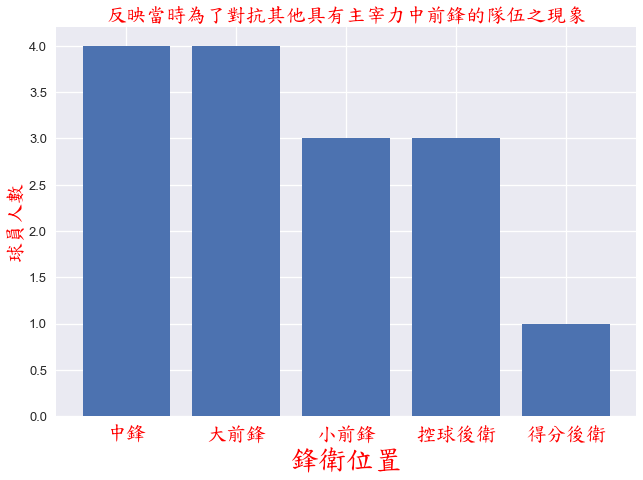

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties
csv_url = 'https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv'
df = pd.read_csv(csv_url)
grouped = df.groupby("Pos")
pos = grouped["Pos"].count()
#可以顯示中文
myfont = FontProperties(fname = "C:\Windows\Fonts\kaiu.ttf")
plt.bar(range(1,6),pos)
plt.xticks(range(1,6),["中鋒","大前鋒","小前鋒","控球後衛","得分後衛"],fontproperties=myfont,c='r',size = 20)
plt.title('反映當時為了對抗其他具有主宰力中前鋒的隊伍之現象',fontproperties=myfont,c='r',size = 20)
plt.xlabel("鋒衛位置",fontproperties=myfont,c='r',size = 28)
plt.ylabel("球員人數",fontproperties=myfont,c='r',size = 20)
plt.show()

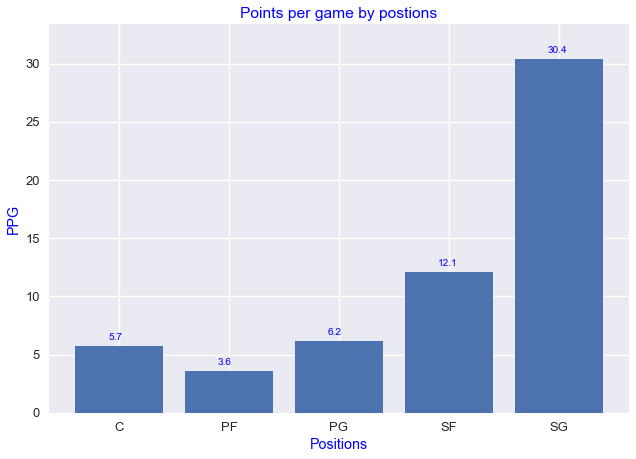

In [30]:
per_game_url = "https://storage.googleapis.com/ds_data_import/stats_per_game_chicago_bulls_1995_1996.csv"
player_info_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"

per_game = pd.read_csv(per_game_url)
player_info = pd.read_csv(player_info_url)
df = pd.merge(player_info,per_game[['Name','PTS/G']],left_on = 'Player',right_on = 'Name')
grouped = df.groupby('Pos')
points_per_game = grouped['PTS/G'].mean()
plt.bar([1,2,3,4,5],point_per_game)
plt.xticks([1,2,3,4,5],point_per_game.index)
plt.ylim(0,point_per_game.max()+3)
plt.title("Points per game by postions",c='b')
plt.xlabel("Positions",c='b')
plt.ylabel("PPG",c='b')
for i,v in enumerate(points_per_game):
    plt.text(i+0.9,v+0.5,"{:.1f}".format(v),c='b')
plt.show()

In [ ]:
# Axes.annotate(s,xy,xytext,xycoards)
# s----------->註釋的文字內容
# xy---------->被註釋的座標
# xytext------>註釋文字的座標
# xycoords---->座標的屬性共8種
# arrowprops-->箭頭的樣式,dict型資料共12種

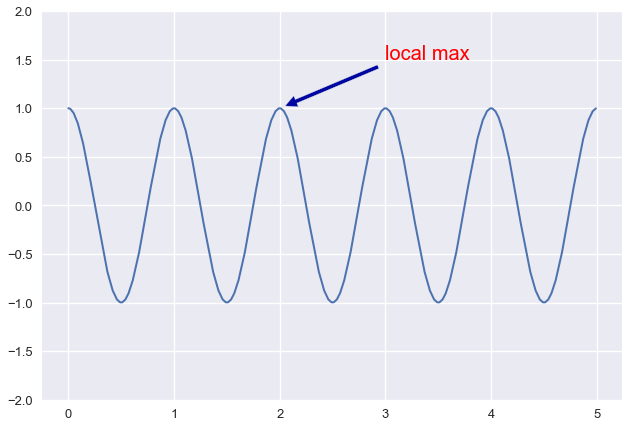

AttributeError: module 'matplotlib.pyplot' has no attribute 'xysoords'

In [56]:
import numpy as np
fig,ax=plt.subplots()#繪圖方法
#繪製一條餘弦曲線
t = np.arange(0.0,5.0,0.01)
s = np.cos(2*np.pi*t)
line,=ax.plot(t,s,lw=2)
#繪製註釋,內端縮排的箭頭
ax.annotate('local max',size=20,c='r',xy=(2,1),xytext=(3,1.5),
            xycoords = 'data',
            arrowprops = dict(facecolor = '#0006a0',shrink = 0.05)
            )
ax.set_ylim(-2,2)
plt.show()


TypeError: transform_point() takes 2 positional arguments but 3 were given

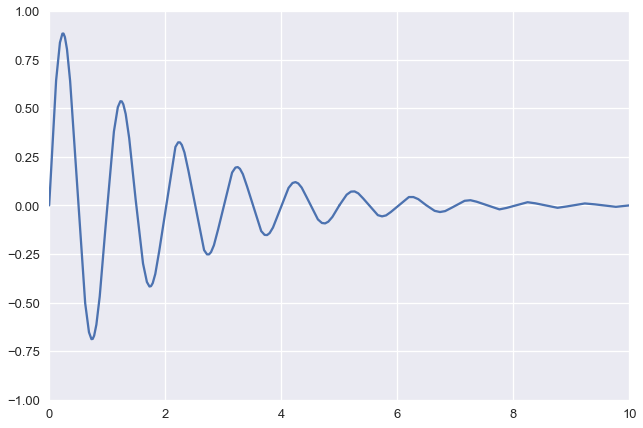

In [64]:
#0.05繪製一條曲線
x = np.arange(0,10,0.0005)
y = np.exp(-x/2)*np.sin(2*np.pi*x) #exp: 納皮爾常數
fig,ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(0,10)
ax.set_ylim(-1,1)
#被註解的資料點座標
xdata,ydata = 5,0
xdisplay,ydisplay = ax.transData.transform_point(xdata,ydata)
#文字的樣式與箭頭的樣式
bbox = dict(boxstyle = 'round',fc='0.8')
arrowprops = dict(
    arrowstyle = '->',
    connectionstyle = "angle,angleA=0,angleB=90,rad=10")

offset = 72
# xycoords預設為'data'資料軸座標，對座標點（5,0）添加註釋
# 註釋文字參考被註釋點設定偏移量，向左2*72points，向上72points
ax.annotate('data = (%.1f, %.1f)'%(xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

# xycoords以繪圖區左下角為參考，單位為畫素
# 註釋文字參考被註釋點設定偏移量，向右0.5*72points，向下72points
disp = ax.annotate('display = (%.1f, %.1f)'%(xdisplay, ydisplay),
            (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
            xycoords='figure pixels',
            textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)


plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_url = ""
df = pd.read_csv(csv_url)
grouped = df.groupbyupby("Pos")
pos = grouped.count()
bar_1 = pos["Player"].loc[["SG","PG"]].values
bar_2 = pos["Player"].loc[["SF","PF","c"]].values

plt.bar(range(1,3),bar_1,label = "Back Court",alpha = 0.6,color = "red")
plt.bar(range(3,6),bar_2,label = "Front Court",alpha = 0.6,)